# Preprocessing

### Importing libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
train_df = pd.read_csv(r'C:\Users\cornellius\Desktop\datascience.dataset\kaggle\titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\cornellius\Desktop\datascience.dataset\kaggle\titanic\test.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [106]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

### Checking the categorical features distribution

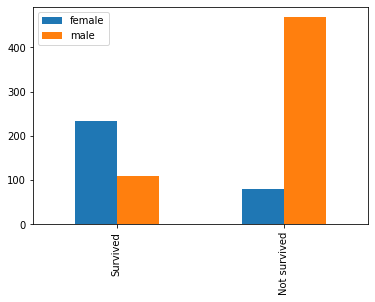

In [109]:
def bar_charts(feature):
    n_survived = train_df[train_df['Survived']==0][feature].value_counts()
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    bar = pd.DataFrame([survived, n_survived])
    bar.index = ['Survived', 'Not survived']
    bar.plot(kind = 'bar', stacked = False)
bar_charts('Sex')

NOTE: it seems like sex has a greate impact on survival rate, so this feature is crucial to be implemented
within the prediction model - women are more likely to survive #1

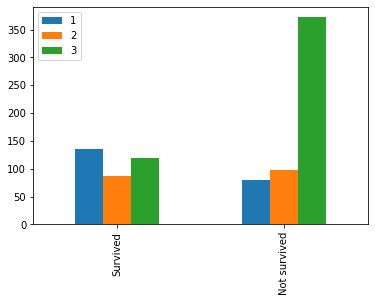

In [110]:
bar_charts('Pclass')

NOTE: The Pclass feature states a correlation between classes in terms of survival - 1st class is more likely to survive than the others, 3d has a higher chance not to survive #2

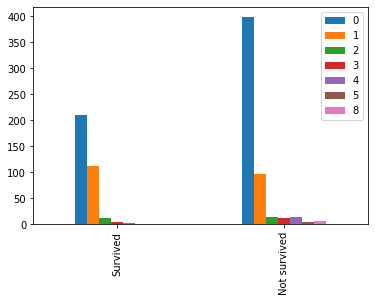

In [111]:
bar_charts('SibSp')

NOTE: There is a high difference in numbers of survival rate of people with no spouse - more likely not survive #3

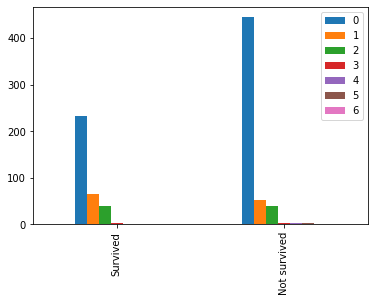

In [112]:
bar_charts('Parch')

NOTE: Like the previous bar chart it is pretty hard to make some strong results, but it's clear that people with no families with them are more likely to survive, same with survived rate #4

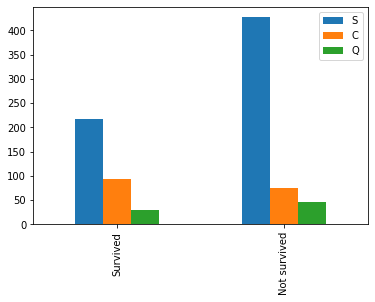

In [113]:
bar_charts('Embarked')

NOTE: same results

# Get rid of the missing data

In [114]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Let's handle age feature with means and std

In [115]:
combined = [train_df, test_df]
for frame in combined:
    std = test_df['Age'].std()
    mean = train_df['Age'].mean()
    null_sum = frame['Age'].isnull().sum()
    age_distr = np.random.randint(mean-std, mean+std, size = null_sum)
    age_col_new = frame['Age'].copy()
    age_col_new[np.isnan(age_col_new)] = age_distr
    frame['Age'] = age_col_new
    frame['Age']=frame['Age'].astype(int)

In [116]:
train_df['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

In [117]:
train_df = train_df.drop(['Cabin'], axis = 1)

In [118]:
test_df = test_df.drop(['Cabin'], axis = 1)

In [119]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [120]:
combined = [test_df, train_df]
for data in combined:
    data['Embarked'] = data['Embarked'].fillna('S')

In [121]:
test_df['Fare'].isnull().sum(), train_df['Fare'].isnull().sum()

(1, 0)

In [122]:
test_df['Fare']= test_df['Fare'].fillna(test_df['Fare'].mean())

In [123]:
test_df['Fare'].isnull().sum()

0

### encoding categorical data

In [124]:
data = [train_df,test_df]
Title = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].map(Title)

In [125]:
train_df = train_df.drop(['Name'],axis = 1)
test_df = test_df.drop(['Name'],axis = 1)

In [126]:
sex = {'male': 0, 'female': 1}
combined = [train_df, test_df]
for dataframe in combined:
    dataframe['Sex']= dataframe['Sex'].map(sex)

In [127]:
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
886,887,0,2,0,27,0,0,211536,13.00,S,5
887,888,1,1,1,19,0,0,112053,30.00,S,2
888,889,0,3,1,37,1,2,W./C. 6607,23.45,S,2
889,890,1,1,0,26,0,0,111369,30.00,C,1
890,891,0,3,0,32,0,0,370376,7.75,Q,1


In [128]:
train_df = train_df.drop(['Ticket'],axis = 1)
test_df = test_df.drop(['Ticket'],axis = 1)

In [129]:
port = {'S':0,'C':1,'Q':2}
train_df['Embarked'] =train_df['Embarked'].map(port)
test_df['Embarked'] =test_df['Embarked'].map(port)

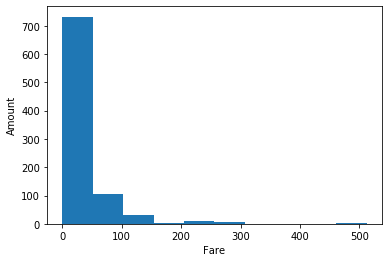

In [130]:
plt.hist(train_df['Fare'])
plt.xlabel('Fare')
plt.ylabel('Amount')
plt.show()

# ML Model

In [131]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


In [132]:
X = train_df.drop('Survived',axis = 1)
y = train_df['Survived']
X_valid = test_df.drop('PassengerId',axis = 1).copy()

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 17)

In [134]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [135]:
y_train.head()

66     1
381    1
223    0
629    0
337    1
Name: Survived, dtype: int64

In [136]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [137]:
%%time
from sklearn.ensemble import RandomForestClassifier
tree_params = {'max_depth': range(1,16), 'max_features': [0.5, 0.7, 1]}
rand_forest = RandomForestClassifier(n_estimators=150, random_state = 17)
forest_grid = GridSearchCV(rand_forest, tree_params)
forest_grid.fit(X_train, y_train)


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 26.3 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=None,
                                              oob_score=False, random_state=17,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forest_grid.best_estimator_.predict(X_test))

0.8097014925373134

In [139]:
rand_forest_new = RandomForestClassifier(n_estimators=150, random_state = 17, max_depth = 9)
rand_forest_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [140]:
accuracy_score(y_test, rand_forest_new.predict(X_test))

0.8022388059701493